In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**age**: age of primary beneficiary

**sex**: insurance contractor gender (male or female) 

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking (yes or no)

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

# The Problem

How to decrease the cost for smokers on insurance companies?  As seen in the data, smokers, on average, cost almost four times as much as non-smokers for insurance companies.  Smokers represent about 16% of the population in the US, which estimates that 37.8 million US adults currently smoke cigarettes  (https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm).  70% of smokers would like to quit smoking (https://www.ncbi.nlm.nih.gov/pubmed?term=22071589).  Most of the smokers who do attempt to quit do so (unsuccessfully) without any assistance, leading to a 3-6% success rate for quiting without assistance (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4562427/).  Behavorial counseling and medications each increase the success rate for quiting, but the combination of the two is more effective than either intervention alone (https://www.cochranelibrary.com/cdsr/doi/10.1002/14651858.CD008286.pub3/full).

# The Potential Solution

Insurance companies are allowed to increase premiums for smokers up to 50% (https://www.cms.gov/CCIIO/Resources/Files/Downloads/market-rules-technical-summary-2-27-2013.pdf).  While this may bring in more revenue the cost for the insurance companies is still almost 4 times greater.  To reduce the amount insurance companies spend on smokers, insurance companies can offer smoking cessation incentives.  Incentivising smoking cessation methods will decrease the number of smokers, thus reducing the cost for insurance companies.  The incentives will be factored in the higher premiums for the smokers so no additional funding would be required to support the incentives.

# The Experiment

The objective is to reduce costs for insurance companies covering smokers through incentivising smoking cessation methods.  More importantly, the goal is to quantify how effective incentivising cessation methods will be for insurance companies.


To start the experiment, a control group and test group will need to be established.  The control will be the smokers covered by the insurance company in this dataset who have not yet received any incentives.  The test will be the same set of smokers for the following year when incentives were available.  This allows for an A/B manipulation where, roughly, the same smoker's costs are analyzed with or without incentives for cessation.


The rollout plan for this experiment is to offer behavorial counselling and medication to the smokers covered by this insurance company.  There is no need to gradually rollout the incentive program because with the incentives being covered by the higher premiums for smokers, the insurance company will have minimal risk.  Also, the sample of smokers for this insurance company is on the smaller, about 20% (274 out of 1338) of the insured are smokers.


The dataset available is a reasonably good representation for the US population, given that it is evenly distributed across this nation, roughly 50/50 for males to females, and contains about 20% smokers. The key metric here will be the average charges for smokers and an alpha value of 0.05 will be used for the independent two sample t-test with equal variance and equal sample size.  The secondary metric of interest will be the percentage of smokers who are taking advantage of the incentives.

# The Analysis

At the end of the year all of the new charges for this insurance company will be obtained.  The average charges for the smokers in the group will be measured.  All of the smokers who were labelled as a smoker for the control group will be considered a smoker for the test group.  Additional information for how many smokers took advantage of the cessation methods and which methods specifically were chosen will be collected.

Success in this experiment is determined by having a p-value less than the alpha of 0.05.  To accomplish this given our sample size, variance, and control data, the average charges for the smokers who now have incentives available would have to be at most $30,428.16.

In [2]:
data = pd.read_csv('insurance.csv')
df=pd.DataFrame(data)
print(df.head())
print(df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


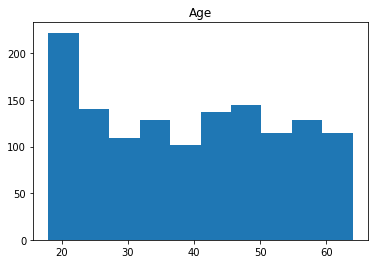

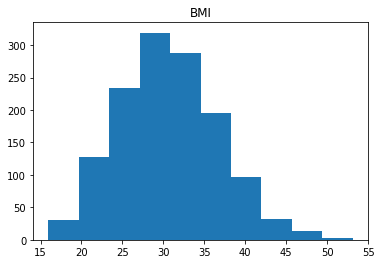

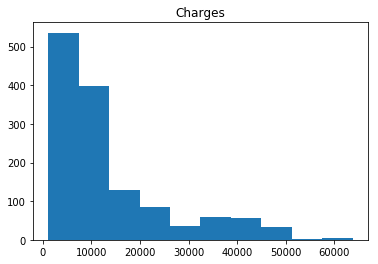

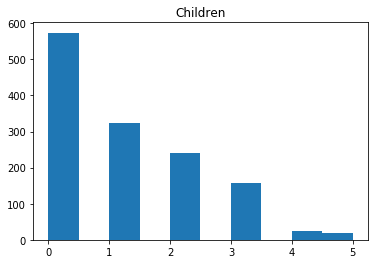

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


In [3]:
#check some distributions for the data
plt.hist(df.age)
plt.title('Age')
plt.show()

plt.hist(df.bmi)
plt.title('BMI')
plt.show()

plt.hist(df.charges)
plt.title('Charges')
plt.show()

plt.hist(df.children)
plt.title('Children')
plt.show()

print(df.region.value_counts())
print(df.sex.value_counts())
print(df.smoker.value_counts())

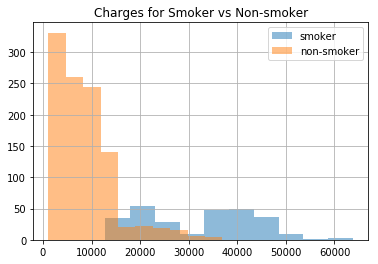

Average charge for smoker:  $32,050.23
Average charge for non-smoker:  $8,434.27

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)


In [4]:
#plot distribution of charges by smoker vs non smoker

smoker = df[df.smoker=='yes']['charges']
nonsmoker = df[df.smoker=='no']['charges']

f = smoker.hist(alpha=0.5, label='smoker')
nonsmoker.hist(ax=f, alpha=0.5, label='non-smoker')
plt.title('Charges for Smoker vs Non-smoker')
plt.legend()
plt.show()

print('Average charge for smoker:  ${:,.2f}'.format(smoker.mean()))
print('Average charge for non-smoker:  ${:,.2f}'.format(nonsmoker.mean()))
print()

print(stats.ttest_ind(smoker,nonsmoker))

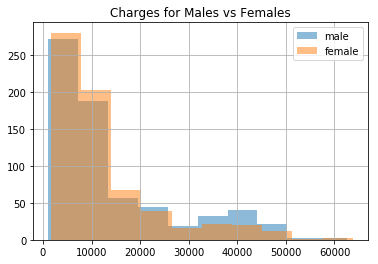

Average charges for males:  $13,956.75
Average charges for females:  $12,569.58

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)


In [5]:
# distribtuion of charges for men vs women

male = df[df.sex=='male']['charges']
female = df[df.sex=='female']['charges']

f = male.hist(alpha=0.5, label='male')
female.hist(alpha=0.5, ax=f, label='female')
plt.title('Charges for Males vs Females')
plt.legend()
plt.show()

print('Average charges for males:  ${:,.2f}'.format(male.mean()))
print('Average charges for females:  ${:,.2f}'.format(female.mean()))
print()
print(stats.ttest_ind(male, female))

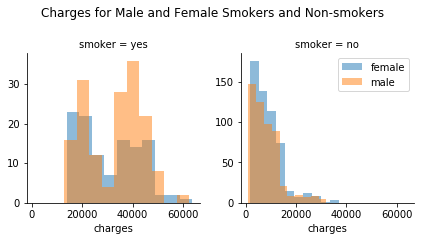

Average charge for male smoker: $33,042.01
Average charge for female smoker: $30,679.00
Average charge for male non-smoker: $8,087.20
Average charge for female non-smoker: $8,762.30

T-stat for smoker: 1.6780825715285819 P-value for smoker:  0.09447953030991117
T-stat for non-smoker: -1.838298450217561 P-value for non-smoker:  0.0662975827670908


In [6]:
# plot distribution of charges by smoker vs non smoker for men and women
g = sns.FacetGrid(df, col='smoker', hue='sex', sharey=False, margin_titles=True)
g.map(plt.hist, 'charges', alpha=0.5)
plt.legend(loc='best')
plt.suptitle('Charges for Male and Female Smokers and Non-smokers',y=1.1)
plt.show()

malesmoker = df[(df.sex=='male')&(df.smoker=='yes')]['charges'].mean()
femalesmoker = df[(df.sex=='female')&(df.smoker=='yes')]['charges'].mean()
malenon = df[(df.sex=='male')&(df.smoker=='no')]['charges'].mean()
femalenon = df[(df.sex=='female')&(df.smoker=='no')]['charges'].mean()

print('Average charge for male smoker: ${:,.2f}'.format(malesmoker))
print('Average charge for female smoker: ${:,.2f}'.format(femalesmoker))
print('Average charge for male non-smoker: ${:,.2f}'.format(malenon))
print('Average charge for female non-smoker: ${:,.2f}'.format(femalenon))
print()
# calculate t-stat and p-value for these plots
smoker_yes = stats.ttest_ind(df[(df.sex=='male')&(df.smoker=='yes')]['charges'], df[(df.sex=='female')&(df.smoker=='yes')]['charges'])
smoker_no = stats.ttest_ind(df[(df.sex=='male')&(df.smoker=='no')]['charges'], df[(df.sex=='female')&(df.smoker=='no')]['charges'])
print('T-stat for smoker: {} P-value for smoker:  {}'.format(smoker_yes[0], smoker_yes[1]))
print('T-stat for non-smoker: {} P-value for non-smoker:  {}'.format(smoker_no[0], smoker_no[1]))

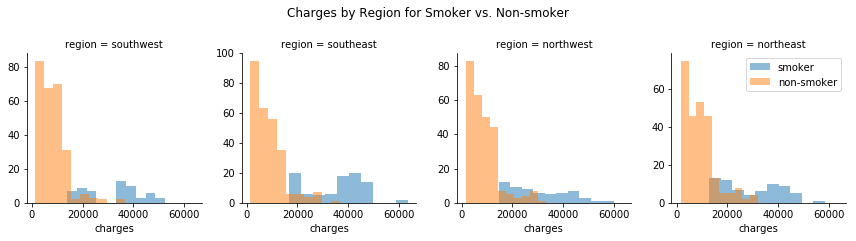

Average charges for smoker in southwest is $32,269.06
Average charges for non-smoker in southwest is $8,019.28
Ttest_indResult(statistic=24.356644907532345, pvalue=4.091755708565509e-75)

Average charges for smoker in southeast is $34,845.00
Average charges for non-smoker in southeast is $8,032.22
Ttest_indResult(statistic=28.552210404013692, pvalue=1.0045835233368891e-94)

Average charges for smoker in northwest is $30,192.00
Average charges for non-smoker in northwest is $8,556.46
Ttest_indResult(statistic=20.33842081118733, pvalue=8.803881698567988e-60)

Average charges for smoker in northeast is $29,673.54
Average charges for non-smoker in northeast is $9,165.53
Ttest_indResult(statistic=19.686764398137857, pvalue=3.408637507182514e-57)



In [7]:
# distribution of charges by region for smokers
g = sns.FacetGrid(df, col='region', hue='smoker', sharey=False)
g.map(plt.hist, 'charges', alpha=.5)
plt.suptitle('Charges by Region for Smoker vs. Non-smoker', y=1.1)
plt.legend(labels=['smoker', 'non-smoker'])
plt.show()

for reg in df.region.unique():
    print('Average charges for smoker in ' +str(reg)+' is ${:,.2f}'.format(df[(df.region==reg)&(df.smoker=='yes')]['charges'].mean()))
    print('Average charges for non-smoker in ' +str(reg)+' is ${:,.2f}'.format(df[(df.region==reg)&(df.smoker=='no')]['charges'].mean()))
    print(stats.ttest_ind(df[(df.region==reg)&(df.smoker=='yes')]['charges'], df[(df.region==reg)&(df.smoker=='no')]['charges']))
    print()

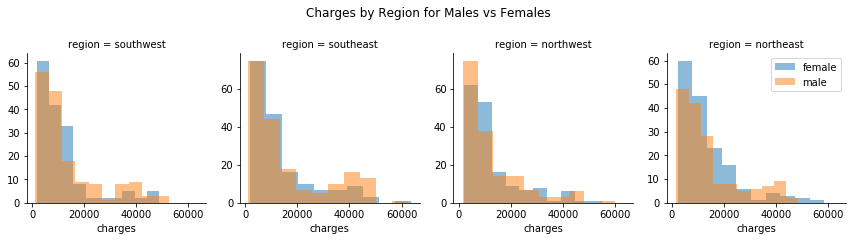

Average charges for males in southwest is $13,412.88
Average charges for females in southwest is $11,274.41
Ttest_indResult(statistic=1.6724863921916966, pvalue=0.09539674093875153)

Average charges for males in southeast is $15,879.62
Average charges for females in southeast is $13,499.67
Ttest_indResult(statistic=1.6274969473122445, pvalue=0.10450162706628432)

Average charges for males in northwest is $12,354.12
Average charges for females in northwest is $12,479.87
Ttest_indResult(statistic=-0.10221222787153196, pvalue=0.918651646429465)

Average charges for males in northeast is $13,854.01
Average charges for females in northeast is $12,953.20
Ttest_indResult(statistic=0.7197189089148328, pvalue=0.47222013477180913)



In [8]:
# distribution of charges by region
g = sns.FacetGrid(df, col='region', hue='sex', sharey=False)
g.map(plt.hist, 'charges', alpha=.5)
plt.suptitle('Charges by Region for Males vs Females', y=1.1)
plt.legend()
plt.show()

for reg in df.region.unique():
    print('Average charges for males in ' +str(reg)+' is ${:,.2f}'.format(df[(df.region==reg)&(df.sex=='male')]['charges'].mean()))
    print('Average charges for females in ' +str(reg)+' is ${:,.2f}'.format(df[(df.region==reg)&(df.sex=='female')]['charges'].mean()))
    print(stats.ttest_ind(df[(df.region==reg)&(df.sex=='male')]['charges'], df[(df.region==reg)&(df.sex=='female')]['charges']))
    print()

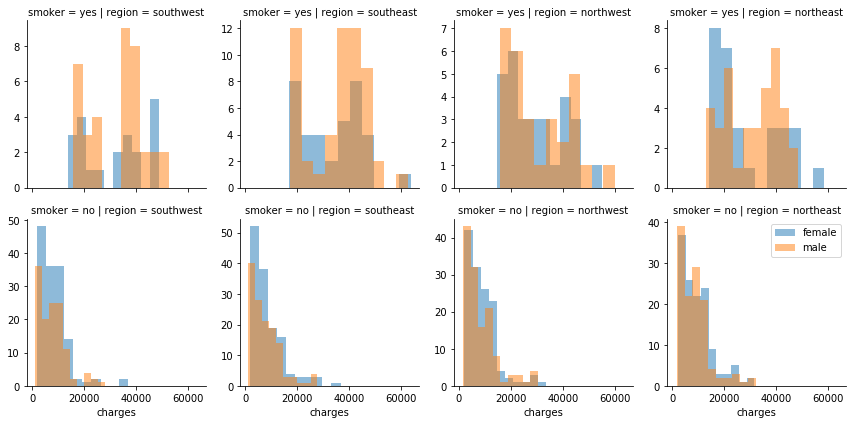

Average charges for male smoker in SOUTHWEST region are $32,598.86
Average charges for female smoker in SOUTHWEST region are $31,687.99
T-stat for smoker and region: SOUTHWEST = 0.2826015855179102
P-value for smoker and region: SOUTHWEST = 0.7790480869418828

Average charges for male non-smoker in SOUTHWEST region are $7,778.91
Average charges for female non-smoker in SOUTHWEST region are $8,234.09
T-stat for non-smoker and region: SOUTHWEST = -0.6782733113557072
P-value for non-smoker and region: SOUTHWEST = 0.4981914674363608

-------------------------------------------------------------------------
Average charges for male smoker in SOUTHEAST region are $36,029.84
Average charges for female smoker in SOUTHEAST region are $33,034.82
T-stat for smoker and region: SOUTHEAST = 1.2275557251510492
P-value for smoker and region: SOUTHEAST = 0.22355841536954393

Average charges for male non-smoker in SOUTHEAST region are $7,609.00
Average charges for female non-smoker in SOUTHEAST region ar

In [9]:
# now let's look at some distributions of the charges for men vs women by region and smoker or not
g = sns.FacetGrid(df, col='region', row='smoker', hue='sex', sharey=False)
g.map(plt.hist, 'charges', alpha=0.5)
plt.legend(loc='best')
plt.show()

# lets figure out if the distributions below are significant
# calculate tstats and pvalues for each plot

for reg in df.region.unique():
    a1 = df[(df['smoker']=='yes')&(df['region']==reg)&(df['sex']=='male')]['charges']
    b1 = df[(df['smoker']=='yes')&(df['region']==reg)&(df['sex']=='female')]['charges']
    a2 = df[(df['smoker']=='no')&(df['region']==reg)&(df['sex']=='male')]['charges']
    b2 = df[(df['smoker']=='no')&(df['region']==reg)&(df['sex']=='female')]['charges']
    t1,p1 = stats.ttest_ind(a1,b1, equal_var=False)
    t2,p2 = stats.ttest_ind(a2,b2, equal_var=False)
    print('Average charges for male smoker in '+ str(reg).upper() + ' region are ${:,.2f}'.format(a1.mean()))
    print('Average charges for female smoker in '+ str(reg).upper() + ' region are ${:,.2f}'.format(b1.mean()))
    print('T-stat for smoker and region: '+str(reg).upper()+' = ' + str(t1))
    print('P-value for smoker and region: '+str(reg).upper()+' = ' + str(p1)+'\n')
    
    print('Average charges for male non-smoker in '+ str(reg).upper() + ' region are ${:,.2f}'.format(a2.mean()))
    print('Average charges for female non-smoker in '+ str(reg).upper() + ' region are ${:,.2f}'.format(b2.mean()))
    print('T-stat for non-smoker and region: '+str(reg).upper()+' = ' + str(t2))
    print('P-value for non-smoker and region: '+str(reg).upper()+' = ' + str(p2)+'\n')
    print('-------------------------------------------------------------------------')

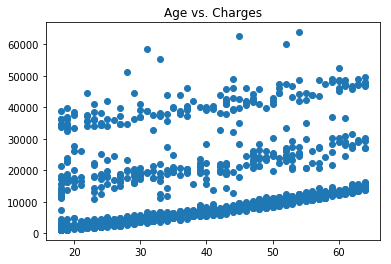

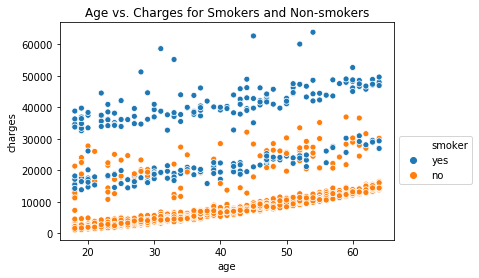

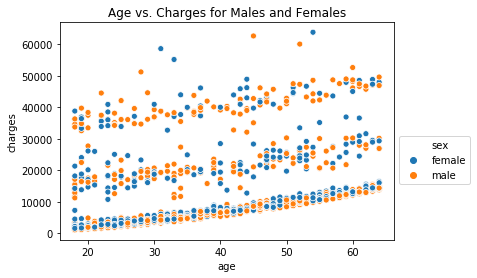

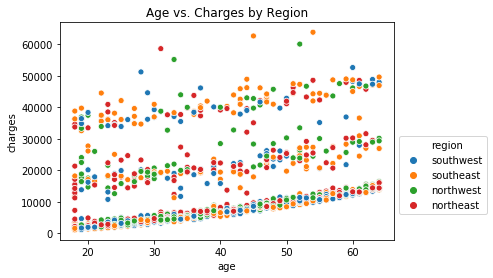

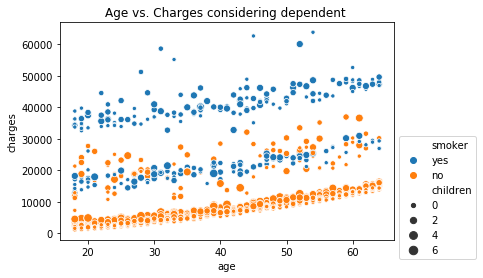

In [10]:
#scatterplots for age vs charge
plt.scatter(x=df.age, y=df.charges)
plt.title('Age vs. Charges')
plt.show()
sns.scatterplot(x=df.age, y=df.charges, hue=df.smoker)
plt.title('Age vs. Charges for Smokers and Non-smokers')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

sns.scatterplot(x=df.age, y=df.charges, hue=df.sex)
plt.title('Age vs. Charges for Males and Females')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

sns.scatterplot(x=df.age, y=df.charges, hue=df.region)
plt.title('Age vs. Charges by Region')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

sns.scatterplot(x=df.age, y=df.charges, hue=df.smoker, size=df.children)
plt.title('Age vs. Charges considering dependent ')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

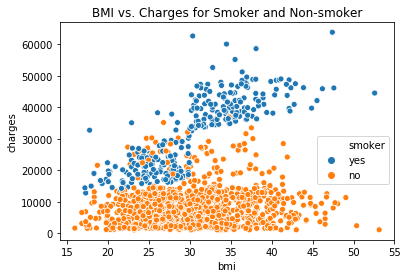

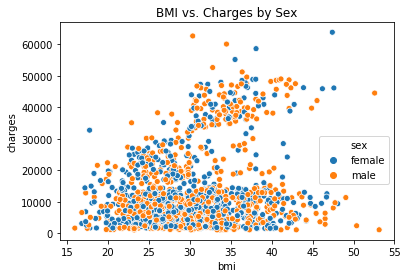

In [11]:
# scatter plots of bmi vs charge
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
plt.title('BMI vs. Charges for Smoker and Non-smoker')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

sns.scatterplot(x=df.bmi, y=df.charges, hue=df.sex)
plt.title('BMI vs. Charges by Sex')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
# calculate the std dev and mean for the smokers in the data

n = (df.smoker=='yes').sum()
dof = 2*n-2
x1 = df[df.smoker=='yes']['charges'].mean()
sx1 = df[df.smoker=='yes']['charges'].std()
#print(x1)
# at dof >100 we will use the inf critical t-value for an alpha value of 0.05 = 1.645
# Solve for the x2 that will give us at least the critical value (assuming variance is equal!)

tc = 1.645

x2 = x1 - tc*sx1*(np.sqrt(1/n))
x2a = x1 - tc*sx1*(np.sqrt(2/n))
#print(x2)
print(x2a)


# at a 50% rollout
n_50 = int(n/2)
np.random.seed(42)
random_50 = np.random.choice(df[df.smoker=='yes']['charges'],n_50)
x1_50 = random_50.mean()
sx1_50 = random_50.std()

x2_50 = x1_50 - tc*sx1_50*(np.sqrt(1/n))
x2a_50 = x1_50 - tc*sx1_50*(np.sqrt(2/n))

print(x2a_50)

30428.161616263493
30997.247067889562


We would need to see the average charges for smokers be at most $30,428.16 to satisfy the alpha of .05.